In [9]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.da tasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# (x_train,y_train), (x_test,y_test) = mnist.load_data()
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [23]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

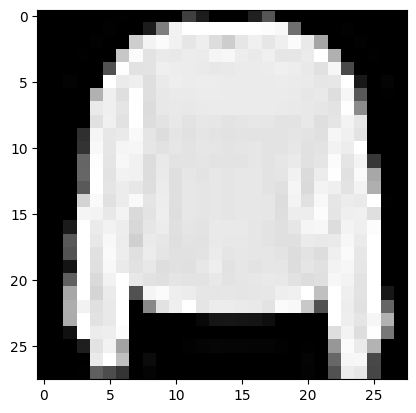

In [24]:
plt.imshow(x_train[7].reshape((28,28)),cmap = 'gray')

In [25]:
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,784).astype("float32")/255.0

print(x_train.shape)

(60000, 784)


In [32]:
# Functional API (A bit more flexible)
inputs = keras.Input(shape = (784,))
x = layers.Dense(256,activation='relu',name = 'first_layer')(inputs)
x = layers.Dense(64,activation='relu',name = 'second_layer')(x)
x = layers.Dense(32,activation='relu',name = 'third_layer')(x)
outputs = layers.Dense(10,activation ='softmax')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
model.fit(x_train,y_train,batch_size=64,epochs=20)
model.evaluate(x_test,y_test,batch_size = 64)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (Dense)                  │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ third_layer (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,818 (858.66 KB)

 Trainable params: 219,818 (858.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7706 - loss: 0.6811
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3778
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8769 - loss: 0.3334
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8807 - loss: 0.3140
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8902 - loss: 0.2939
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8944 - loss: 0.2810
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9013 - loss: 0.2590
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9071 - loss: 0.2514
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9075 - loss: 0.2451
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9131 - loss: 0.2298
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9151 - loss: 0.2196
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms

[0.36611783504486084, 0.8888000249862671]

In [27]:
np.argmax(model.predict(np.array([x_train[0]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


9

In [28]:
ypred = np.argmax(model.predict(x_test),axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


In [29]:
np.mean(ypred == y_test)

0.8782

In [30]:
ypred[0]

9

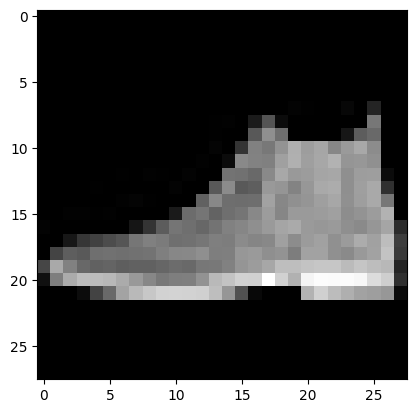

In [31]:
plt.imshow(x_test[0].reshape((28,28)),cmap = 'gray')